# This is a classification problem to distinguish between a signal process which produces Higgs bosons and a background process which does not.

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.

<span style="color:blue"> Searching for exotic particles in high-energy physics with deep learning. </span>
By P. Baldi, Peter Sadowski, D. Whiteson. 2014
Published in Nature Communications

In [3]:
import ROOT
import os
 
TMVA = ROOT.TMVA

Welcome to JupyROOT 6.28/00


# Options to control used methods

In [4]:
useLikelihood = False  # likelihood based discriminant
useLikelihoodKDE = False  # likelihood based discriminant
useFischer = True  # Fischer discriminant
useMLP = True  # Multi Layer Perceptron (old TMVA NN implementation)
useBDT = False  # Boosted Decision Tree
useDL = False  # TMVA Deep learning ( CPU or GPU)
useKeras = False  # Use Keras Deep Learning via PyMVA

# Setup Dataset(s)
 
## Define now input data file and signal and background trees

In [5]:
TFile = ROOT.TFile

inputFileName = "Higgs_data.root"
inputFileLink = "http://root.cern.ch/files/" + inputFileName


if ROOT.gSystem.AccessPathName(inputFileName):
    ROOT.Info("TMVA_Higgs_Classification", "Download Higgs_data.root file")
    TFile.SetCacheFileDir(".")
    inputFile = TFile.Open(inputFileLink, "CACHEREAD")
    if inputFile is None:
        raise FileNotFoundError("Input file cannot be downloaded - exit")
else:
    # file exists
    inputFile = TFile.Open(inputFileName)

In [6]:
inputFile.ls()

TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	tree
  KEY: TTree	bkg_tree;1	tree


In [7]:
# --- Register the training and test trees
signalTree = inputFile.Get("sig_tree")
backgroundTree = inputFile.Get("bkg_tree")
signalTree.Print()

******************************************************************************
*Tree    :sig_tree  : tree                                                   *
*Entries :    10000 : Total =         1177229 bytes  File  Size =     785298 *
*        :          : Tree compression factor =   1.48                       *
******************************************************************************
*Br    0 :Type      : Type/F                                                 *
*Entries :    10000 : Total  Size=      40556 bytes  File Size  =        307 *
*Baskets :        1 : Basket Size=    1500672 bytes  Compression= 130.54     *
*............................................................................*
*Br    1 :lepton_pT : lepton_pT/F                                            *
*Entries :    10000 : Total  Size=      40581 bytes  File Size  =      30464 *
*Baskets :        1 : Basket Size=    1500672 bytes  Compression=   1.32     *
*...................................................

In [8]:
branches = signalTree.GetListOfBranches()

In [9]:
print(branches)

{ @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178, @0x16d7a3178 }


In [10]:
# Iterate through the branches and print their names
for branch in branches:
    print(branch.GetName())

Type
lepton_pT
lepton_eta
lepton_phi
missing_energy_magnitude
missing_energy_phi
jet1_pt
jet1_eta
jet1_phi
jet1_b-tag
jet2_pt
jet2_eta
jet2_phi
jet2_b-tag
jet3_pt
jet3_eta
jet3_phi
jet3_b-tag
jet4_pt
jet4_eta
jet4_phi
jet4_b-tag
m_jj
m_jjj
m_lv
m_jlv
m_bb
m_wbb
m_wwbb


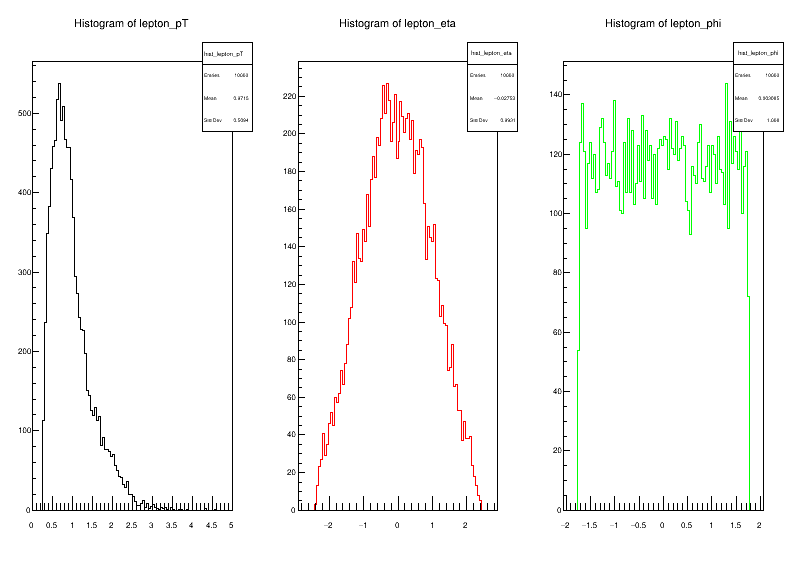

In [11]:
# List of branches to plot
branches = ["lepton_pT", "lepton_eta", "lepton_phi"]

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Canvas", 800, 600)

# Create a multi-pad canvas (e.g., 1 row, 3 columns)
canvas.Divide(len(branches), 1)

# Loop over branches and draw histograms
for i, branch_name in enumerate(branches, start=1):
    # Select the pad
    canvas.cd(i)

    # Draw the histogram
    signalTree.Draw(f"{branch_name}>>hist_{branch_name}", "", "hist")

    # Customize histogram
    hist = ROOT.gDirectory.Get(f"hist_{branch_name}")
    hist.SetTitle(f"Histogram of {branch_name}")
    hist.SetLineColor(i)

    # Draw the histogram on the canvas
    hist.Draw()

# Display the canvas
canvas.Draw()

10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


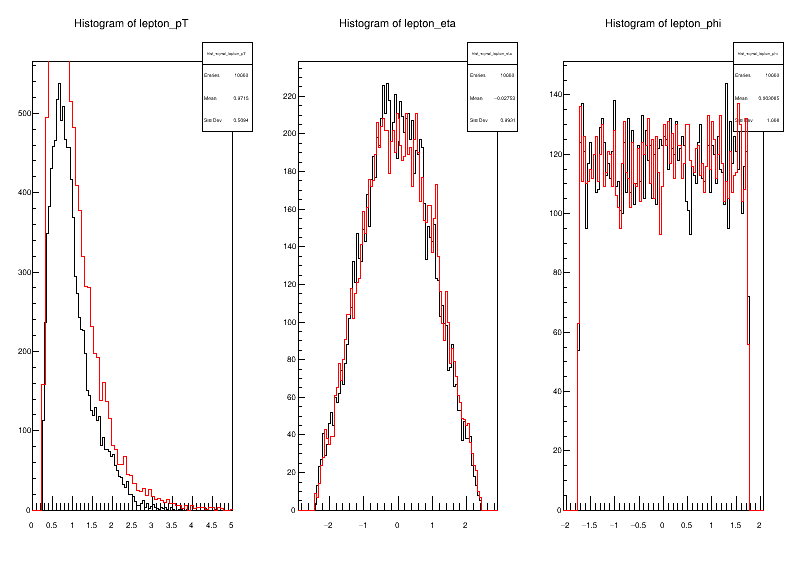

In [12]:
# List of branches to plot
branches = ["lepton_pT", "lepton_eta", "lepton_phi"]

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Canvas", 800, 600)

# Create a multi-pad canvas (e.g., 1 row, 3 columns)
canvas.Divide(len(branches), 1)

# Loop over branches and draw histograms
for i, branch_name in enumerate(branches, start=1):
    # Select the pad
    canvas.cd(i)

    # Draw the histogram
    signalTree.Draw(f"{branch_name}>>hist_signal_{branch_name}", "", "hist")

    # Customize histogram
    hist_signal = ROOT.gDirectory.Get(f"hist_signal_{branch_name}")
    hist_signal.SetTitle(f"Histogram of {branch_name}")
    hist_signal.SetLineColor(1)

    
        # Draw the histogram
    backgroundTree.Draw(f"{branch_name}>>hist_bkg_{branch_name}", "", "hist")

    # Customize histogram
    hist_bkg = ROOT.gDirectory.Get(f"hist_bkg_{branch_name}")
    hist_bkg.SetTitle(f"Histogram of {branch_name}")
    hist_bkg.SetLineColor(2)
    

    print(hist_signal.Integral())
    print(hist_bkg.Integral())
    # Draw the histogram on the canvas
    hist_signal.Draw()
    hist_bkg.Draw("SAME")

# Display the canvas
canvas.Draw()

### Declare DataLoader(s)
 
The next step is to declare the DataLoader class that deals with input variables
Define the input variables that shall be used for the MVA training
note that you may also use variable expressions, which can be parsed by TTree::Draw( "expression" )]

In [13]:
loader = TMVA.DataLoader("dataset")
 
loader.AddVariable("m_jj")
loader.AddVariable("m_jjj")
loader.AddVariable("m_lv")
loader.AddVariable("m_jlv")
loader.AddVariable("m_bb")
loader.AddVariable("m_wbb")
loader.AddVariable("m_wwbb")
 
# We set now the input data trees in the TMVA DataLoader class
# global event weights per tree (see below for setting event-wise weights)
signalWeight = 1.0
backgroundWeight = 1.0
# You can add an arbitrary number of signal or background trees
loader.AddSignalTree(signalTree, signalWeight)
loader.AddBackgroundTree(backgroundTree, backgroundWeight)
 

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree sig_tree of type Signal with 10000 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree bkg_tree of type Background with 10000 events


In [14]:
# Set individual event weights (the variables must exist in the original TTree)
#   for signal    : factory->SetSignalWeightExpression    ("weight1*weight2");
#   for background: factory->SetBackgroundWeightExpression("weight1*weight2");
#   loader->SetBackgroundWeightExpression( "weight" );
 
 
# Apply additional cuts on the signal and background samples (can be different)
mycuts = ROOT.TCut("")  # for example: TCut mycuts = "abs(var1)<0.5 && abs(var2-0.5)<1";
mycutb = ROOT.TCut("")  # for example: TCut mycutb = "abs(var1)<0.5";
 
# Tell the factory how to use the training and testing events
#
# If no numbers of events are given, half of the events in the tree are used
# for training, and the other half for testing:
#    loader->PrepareTrainingAndTestTree( mycut, "SplitMode=random:!V" );
# To also specify the number of testing events, use:
 
loader.PrepareTrainingAndTestTree(
    mycuts, mycutb, nTrain_Signal=7000, nTrain_Background=7000, SplitMode="Random", NormMode="NumEvents", V=False
)

In [15]:
outputFile = TFile.Open("Higgs_ClassificationOutput.root", "RECREATE")
factory = TMVA.Factory(
    "TMVA_Higgs_Classification", outputFile, V=False, ROC=True, Silent=False, Color=True, AnalysisType="Classification"
)

In [16]:
## Booking Methods
 
# Here we book the TMVA methods. We book first a Likelihood based on KDE (Kernel Density Estimation), a Fischer discriminant, a BDT
# and a shallow neural network
# Likelihood ("naive Bayes estimator")
if useLikelihood:
    factory.BookMethod(
        loader,
        TMVA.Types.kLikelihood,
        "Likelihood",
        H=True,
        V=False,
        TransformOutput=True,
        PDFInterpol="Spline2:NSmoothSig[0]=20:NSmoothBkg[0]=20:NSmoothBkg[1]=10",
        NSmooth=1,
        NAvEvtPerBin=50,
    )
 
# Use a kernel density estimator to approximate the PDFs
if useLikelihoodKDE:
    factory.BookMethod(
        loader,
        TMVA.Types.kLikelihood,
        "LikelihoodKDE",
        H=False,
        V=False,
        TransformOutput=False,
        PDFInterpol="KDE",
        KDEtype="Gauss",
        KDEiter="Adaptive",
        KDEFineFactor=0.3,
        KDEborder=None,
        NAvEvtPerBin=50,
    )
 
# Fisher discriminant (same as LD)
if useFischer:
    factory.BookMethod(
        loader,
        TMVA.Types.kFisher,
        "Fisher",
        H=True,
        V=False,
        Fisher=True,
        VarTransform=None,
        CreateMVAPdfs=True,
        PDFInterpolMVAPdf="Spline2",
        NbinsMVAPdf=50,
        NsmoothMVAPdf=10,
    )
 
# Boosted Decision Trees
if useBDT:
    factory.BookMethod(
        loader,
        TMVA.Types.kBDT,
        "BDT",
        V=False,
        NTrees=200,
        MinNodeSize="2.5%",
        MaxDepth=2,
        BoostType="AdaBoost",
        AdaBoostBeta=0.5,
        UseBaggedBoost=True,
        BaggedSampleFraction=0.5,
        SeparationType="GiniIndex",
        nCuts=20,
    )
 
# Multi-Layer Perceptron (Neural Network)
if useMLP:
    factory.BookMethod(
        loader,
        TMVA.Types.kMLP,
        "MLP",
        H=False,
        V=False,
        NeuronType="tanh",
        VarTransform="N",
        NCycles=100,
        HiddenLayers="N+5",
        TestRate=5,
        UseRegulator=False,
    )
 
## Here we book the new DNN of TMVA if we have support in ROOT. We will use GPU version if ROOT is enabled with GPU
 
 
## Booking Deep Neural Network
 
# Here we define the option string for building the Deep Neural network model.
 
#### 1. Define DNN layout
 
# The DNN configuration is defined using a string. Note that whitespaces between characters are not allowed.
 
# We define first the DNN layout:
 
# - **input layout** :   this defines the input data format for the DNN as  ``input depth | height | width``.
# In case of a dense layer as first layer the input layout should be  ``1 | 1 | number of input variables`` (features)
# - **batch layout**  : this defines how are the input batch. It is related to input layout but not the same.
# If the first layer is dense it should be ``1 | batch size ! number of variables`` (features)
 
# *(note the use of the character `|` as  separator of  input parameters for DNN layout)*
 
# note that in case of only dense layer the input layout could be omitted but it is required when defining more
# complex architectures
 
# - **layer layout** string defining the layer architecture. The syntax is
# - layer type (e.g. DENSE, CONV, RNN)
# - layer parameters (e.g. number of units)
# - activation function (e.g  TANH, RELU,...)
 
# *the different layers are separated by the ``","`` *
 
#### 2. Define Training Strategy
 
# We define here the training strategy parameters for the DNN. The parameters are separated by the ``","`` separator.
# One can then concatenate different training strategy with different parameters. The training strategy are separated by
# the ``"|"`` separator.
 
# - Optimizer
# - Learning rate
# - Momentum (valid for SGD and RMSPROP)
# - Regularization and Weight Decay
# - Dropout
# - Max number of epochs
# - Convergence steps. if the test error will not decrease after that value the training will stop
# - Batch size (This value must be the same specified in the input layout)
# - Test Repetitions (the interval when the test error will be computed)
 
 
#### 3. Define general DNN options
 
# We define the general DNN options concatenating in the final string the previously defined layout and training strategy.
# Note we use the ``":"`` separator to separate the different higher level options, as in the other TMVA methods.
# In addition to input layout, batch layout and training strategy we add now:
 
# - Type of Loss function (e.g. CROSSENTROPY)
# - Weight Initizalization (e.g XAVIER, XAVIERUNIFORM, NORMAL )
# - Variable Transformation
# - Type of Architecture (e.g. CPU, GPU, Standard)
 
# We can then book the DL method using the built option string
if useDL:
    useDLGPU = ROOT.gSystem.GetFromPipe("root-config --has-tmva-gpu") == "yes"
 
    # Define DNN layout
    # Define Training strategies
    # one can catenate several training strategies
    training1 = ROOT.TString(
        "LearningRate=1e-3,Momentum=0.9,"
        "ConvergenceSteps=10,BatchSize=128,TestRepetitions=1,"
        "MaxEpochs=20,WeightDecay=1e-4,Regularization=None,"
        "Optimizer=ADAM,ADAM_beta1=0.9,ADAM_beta2=0.999,ADAM_eps=1.E-7,"  # ADAM default parameters
        "DropConfig=0.0+0.0+0.0+0."
    )
    #   training2 = ROOT.TString("LearningRate=1e-3,Momentum=0.9"
    #                      "ConvergenceSteps=10,BatchSize=128,TestRepetitions=1,"
    #                       "MaxEpochs=20,WeightDecay=1e-4,Regularization=None,"
    #                       "Optimizer=SGD,DropConfig=0.0+0.0+0.0+0.")
 
    # General Options.
    dnnMethodName = ROOT.TString("DNN_CPU")
 
    if useDLGPU:
        arch = "GPU"
        dnnMethodName = "DNN_GPU"
    else:
        arch = "CPU"
 
    factory.BookMethod(
        loader,
        TMVA.Types.kDL,
        dnnMethodName,
        H=False,
        V=True,
        ErrorStrategy="CROSSENTROPY",
        VarTransform="G",
        WeightInitialization="XAVIER",
        InputLayout="1|1|7",
        BatchLayout="1|128|7",
        Layout="DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|1|LINEAR",
        TrainingStrategy=training1,
        Architecture=arch,
    )
 
# Keras DL
if useKeras:
    ROOT.Info("TMVA_Higgs_Classification", "Building Deep Learning keras model")
    # create Keras model with 4 layers of 64 units and relu activations
    import tensorflow
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.layers import Input, Dense
 
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=7))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), weighted_metrics=["accuracy"])
    model.save("model_higgs.h5")
    model.summary()
 
    if not os.path.exists("model_higgs.h5"):
        raise FileNotFoundError("Error creating Keras model file - skip using Keras")
    else:
        # book PyKeras method only if Keras model could be created
        ROOT.Info("TMVA_Higgs_Classification", "Booking Deep Learning keras model")
        factory.BookMethod(
            loader,
            TMVA.Types.kPyKeras,
            "PyKeras",
            H=True,
            V=False,
            VarTransform=None,
            FilenameModel="model_higgs.h5",
            FilenameTrainedModel="trained_model_higgs.h5",
            NumEpochs=20,
            BatchSize=100,
        )
#            GpuOptions="allow_growth=True",
#        )  # needed for RTX NVidia card and to avoid TF allocates all GPU memory

Factory                  : Booking method: Fisher
                         : 
Factory                  : Booking method: MLP
                         : 
MLP                      : [dataset] : Create Transformation "N" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'm_jj' <---> Output : variable 'm_jj'
                         : Input : variable 'm_jjj' <---> Output : variable 'm_jjj'
                         : Input : variable 'm_lv' <---> Output : variable 'm_lv'
                         : Input : variable 'm_jlv' <---> Output : variable 'm_jlv'
                         : Input : variable 'm_bb' <---> Output : variable 'm_bb'
                         : Input : variable 'm_wbb' <---> Output : variable 'm_wbb'
                         : Input : variable 'm_wwbb' <---> Output : variable 'm_wwbb'
MLP                      : Building Network. 
                         : In

In [17]:
# Train Methods
 
# Here we train all the previously booked methods.
 
factory.TrainAllMethods()
## Test  all methods
 
# Now we test and evaluate all methods using the test data set
factory.TestAllMethods()
 
factory.EvaluateAllMethods()

Factory                  : Train all methods
                         : Rebuilding Dataset dataset
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree sig_tree
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree bkg_tree
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : 
                         : Number of training and testing events
                         : ---------------------------------------------------------------------------
                         : Signal     -- training events            : 7000
                         : Signal     -- testing events             : 3000
                         : Signal     -- training and testing events: 10000
                         : Background -- training events          

0%, time left: unknown
7%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
57%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
7%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
57%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
1%, time left: unknown
8%, time left: 2 sec
14%, time left: 2 sec
20%, time left: 2 sec
26%, time left: 2 sec
33%, time left: 1 sec
39%, time left: 1 sec
45%, time left: 1 sec
51%, time left: 1 sec
58%, time left: 1 sec
64%, time left: 1 sec
70%, time left: 0 sec
76%, time left: 0 sec
83%, time 

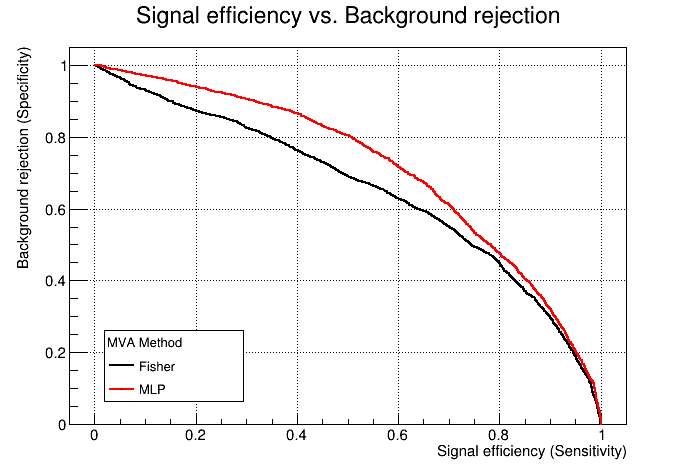

In [18]:
# after we get the ROC curve and we display
 
c1 = factory.GetROCCurve(loader)
c1.Draw()
# at the end we close the output file which contains the evaluation result of all methods and it can be used by TMVAGUI
# to display additional plots
 
outputFile.Close()

## Let's Look at the New variable created by the Discriminator

In [19]:
output_file = ROOT.TFile('Higgs_ClassificationOutput.root', 'READ')

sig_outputSroce_hist = output_file.Get('dataset/Method_Fisher/Fisher/MVA_Fisher_Proba_S')
bkg_outputSroce_hist = output_file.Get('dataset/Method_Fisher/Fisher/MVA_Fisher_Proba_B')

## Plotting the histograms

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


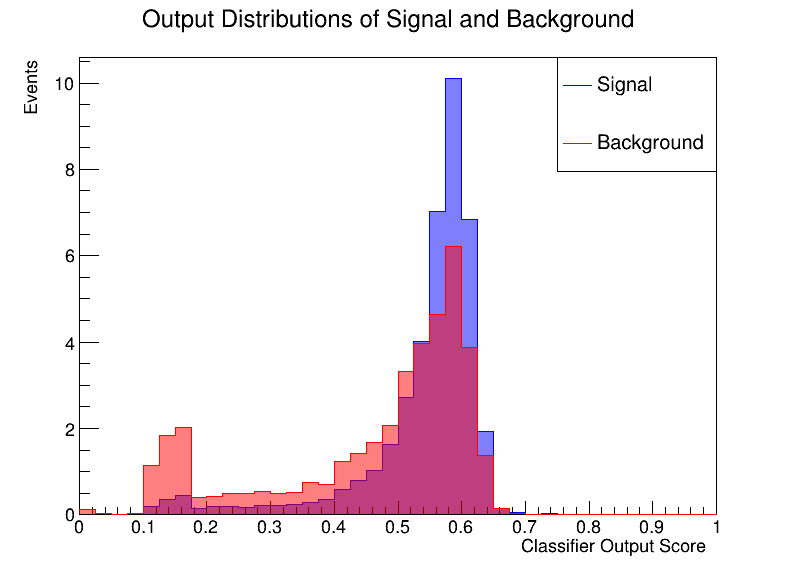

In [22]:
canvas = ROOT.TCanvas("canvas", "Output Distributions", 800, 600)
sig_outputSroce_hist.SetLineColor(ROOT.kBlue)
sig_outputSroce_hist.SetFillColorAlpha(ROOT.kBlue, 0.5)
sig_outputSroce_hist.Draw("HIST")
bkg_outputSroce_hist.SetLineColor(ROOT.kRed)
bkg_outputSroce_hist.SetFillColorAlpha(ROOT.kRed, 0.5)
bkg_outputSroce_hist.Draw("HIST SAME")


#ROOT.gStyle.SetOptStat(0)

# Adding legend
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(sig_outputSroce_hist, "Signal", "l")
legend.AddEntry(bkg_outputSroce_hist, "Background", "l")
legend.Draw()

# Adding labels and title
sig_outputSroce_hist.SetTitle("Output Distributions of Signal and Background")
sig_outputSroce_hist.GetXaxis().SetTitle("Classifier Output Score")
sig_outputSroce_hist.GetYaxis().SetTitle("Events")
canvas.Update()
canvas.Draw()